# Direct Marketing Campaigns 

- the goal is to predict if the client will subscribe a term deposit

### Dataset Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 

Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001
  Available at: 
  - [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
  - [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt


### Dataset description:

Input variables:
#### Bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. balance: average yearly balance, in euros (numeric) 
7. housing: has housing loan? (categorical: 'no','yes','unknown')
8. loan: has personal loan? (categorical: 'no','yes','unknown')
#### Related with the last contact of the current campaign:
9. contact: contact communication type (categorical: 'cellular','telephone')
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### Other attributes:
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):
17. y - has the client subscribed a term deposit? (binary: 'yes','no')


### ML models:
1. Logistic Regression
2. K-Nearest Neighbours
3. Support Vector Machine
4. Kernel SVM
5. Naive Bayes
6. Decision Tree Classification
7. Random Forest Classification
8. XGBoost
9. Artificial Neural Networks

## Import Libraries and Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
sns.set()
%matplotlib inline

In [2]:
dataset = pd.read_csv('bank-smaller.csv', delimiter=";")

## Exploratory Data Analysis

In [3]:
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no
9,43,services,married,primary,no,-88,yes,yes,cellular,17,apr,313,1,147,2,failure,no


In [4]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
dataset.duplicated().sum()

0

In [7]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                       'contact', 'month', 'poutcome']
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

### Categorical Columns

In [9]:
# Function for drawing categorical columns in Seaborn. Need to pass dimension (size_x and size_y), column name, and title.
def categorical_columns_countplot(size_x, size_y, column, title):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_x, size_y)
    sns.countplot(x = column, data = dataset)
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    ax.set_xlabel("", fontsize = 15)
    ax.set_ylabel("", fontsize = 15)
    ax.set_title(title, fontsize = 15)
    ax.tick_params(labelsize = 15)
    
    sns.despine()

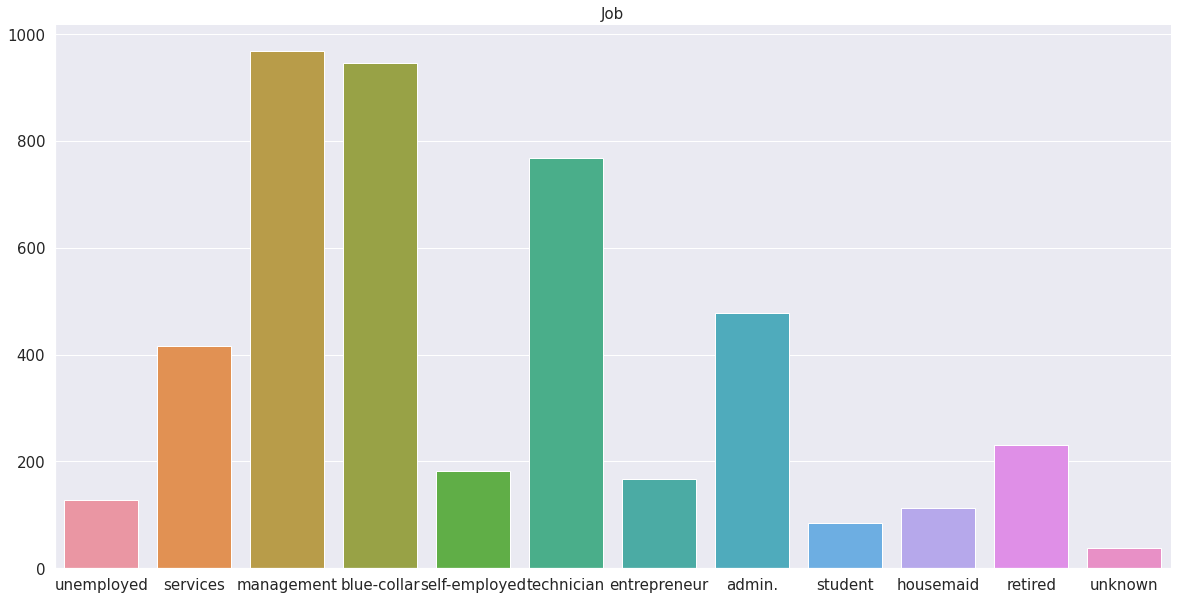

In [10]:
categorical_columns_countplot(20, 10, categorical_columns[0], "Job")

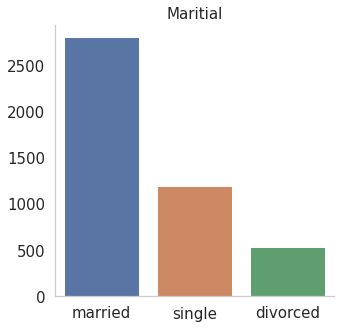

In [11]:
categorical_columns_countplot(5, 5, categorical_columns[1], "Maritial")

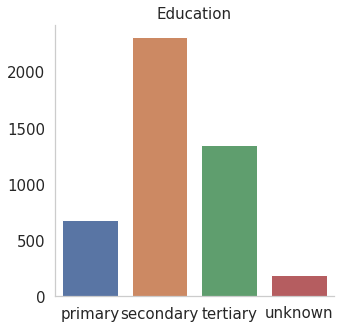

In [12]:
categorical_columns_countplot(5, 5, categorical_columns[2], "Education")

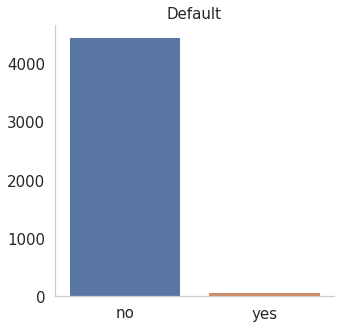

In [13]:
categorical_columns_countplot(5, 5, categorical_columns[3], "Default")

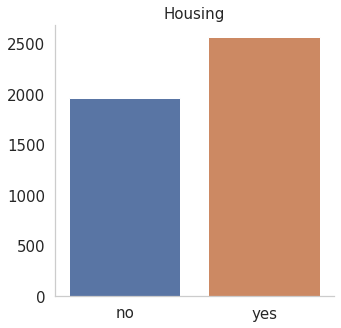

In [14]:
categorical_columns_countplot(5, 5, categorical_columns[4], "Housing")

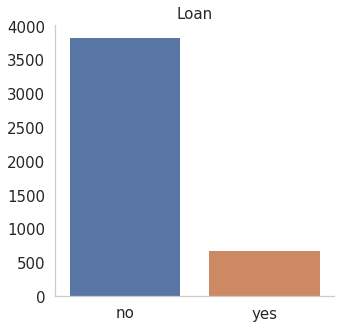

In [15]:
categorical_columns_countplot(5, 5, categorical_columns[5], "Loan")

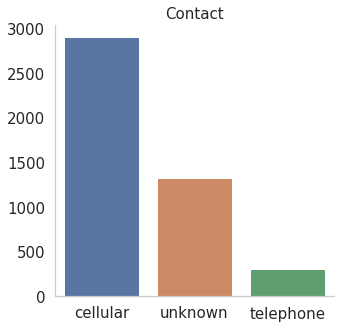

In [16]:
categorical_columns_countplot(5, 5, categorical_columns[6], "Contact")

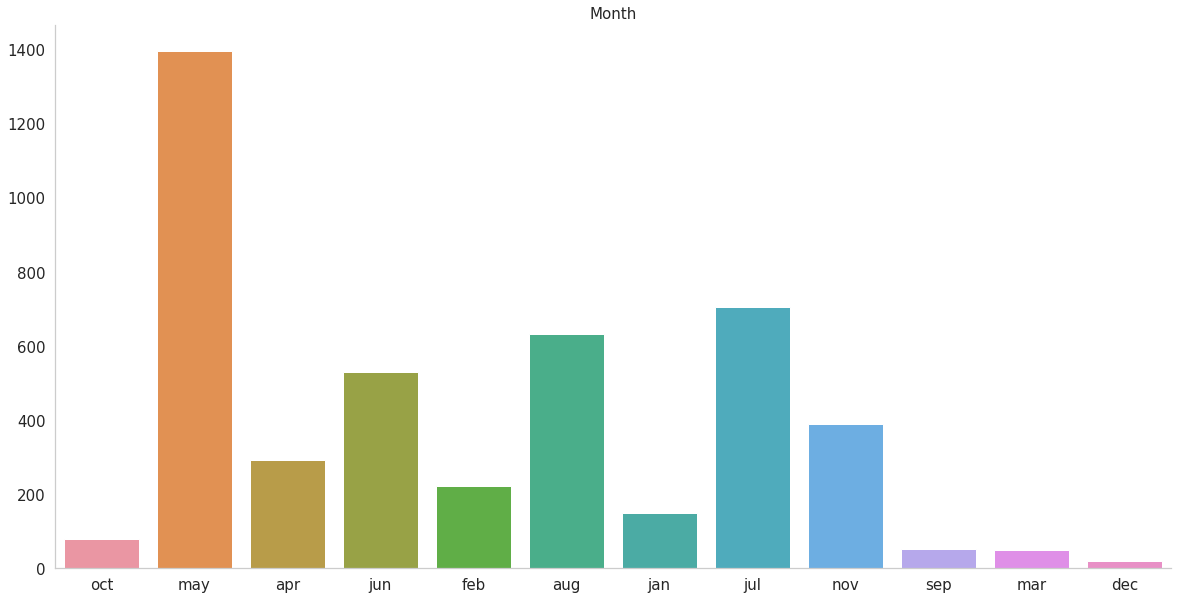

In [17]:
categorical_columns_countplot(20, 10, categorical_columns[7], "Month")

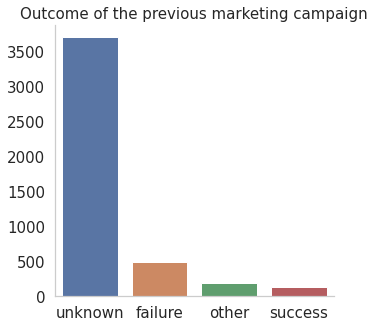

In [18]:
categorical_columns_countplot(5, 5, categorical_columns[8], "Outcome of the previous marketing campaign")

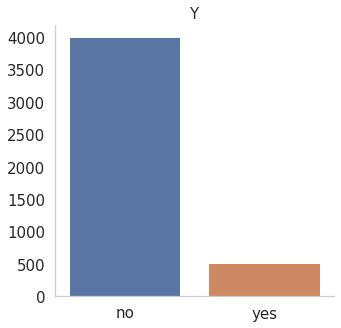

In [19]:
categorical_columns_countplot(5, 5, dataset["y"], "Y")

### Numerical Columns

In [20]:
# Function for drawing numerical columns. Need to pass dimension (size_x and size_y), column name, and title.
def numerical_columns_histplot(size_x, size_y, column, title):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_x, size_y)
    
    ax.hist(dataset[column])
    ax.set_xlabel("", fontsize = 15)
    ax.set_ylabel("", fontsize = 15)
    ax.set_title(title, fontsize = 15)
    ax.tick_params(labelsize = 15)

    sns.despine()

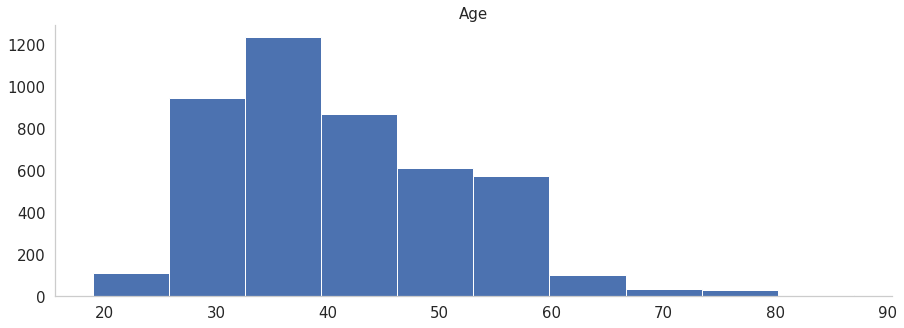

In [21]:
numerical_columns_histplot(15, 5, numerical_columns[0], "Age")

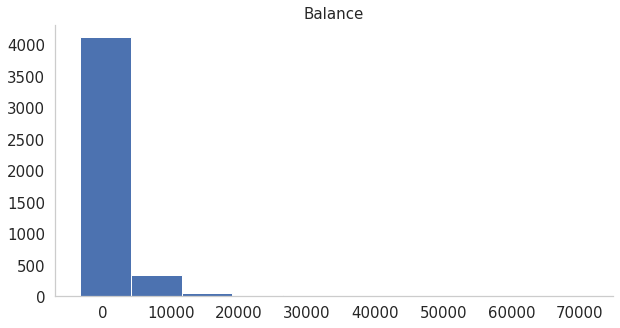

In [22]:
numerical_columns_histplot(10, 5, numerical_columns[1], "Balance")

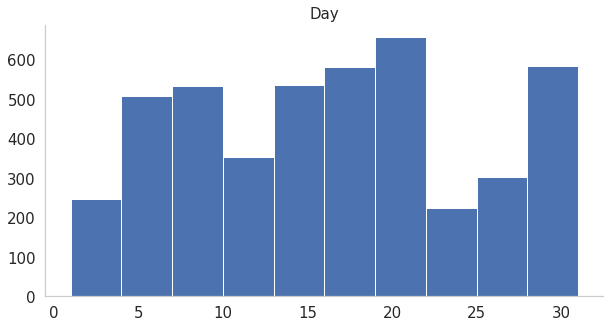

In [23]:
numerical_columns_histplot(10, 5, numerical_columns[2], "Day")

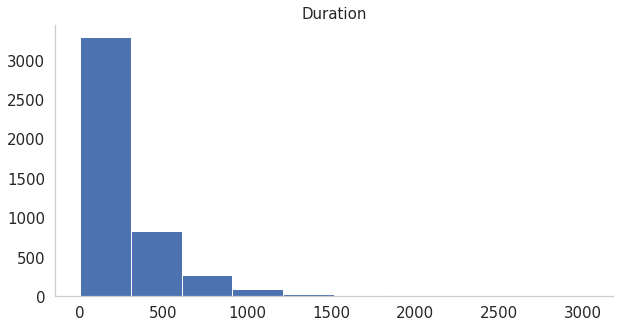

In [24]:
numerical_columns_histplot(10, 5, numerical_columns[3], "Duration")

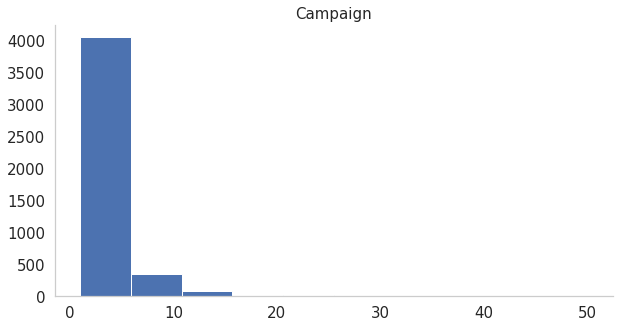

In [25]:
numerical_columns_histplot(10, 5, numerical_columns[4], "Campaign")

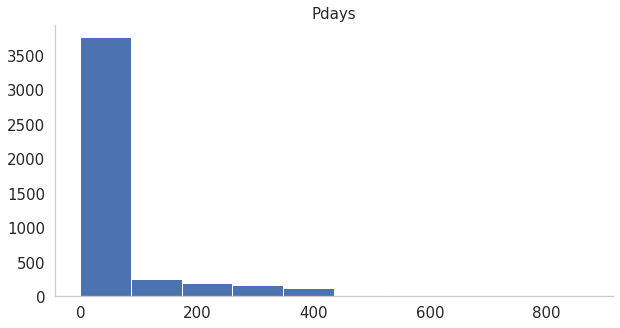

In [26]:
numerical_columns_histplot(10, 5, numerical_columns[5], "Pdays")

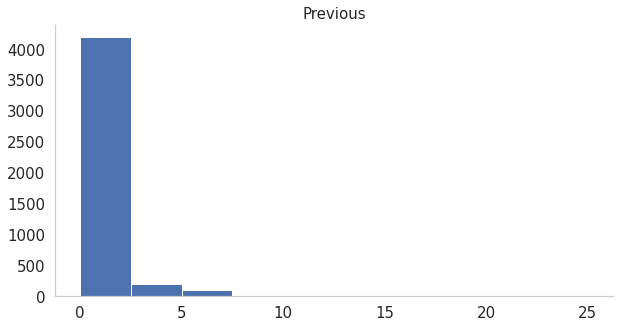

In [27]:
numerical_columns_histplot(10, 5, numerical_columns[6], "Previous")

### Searching for Outliers

In [28]:
dataset[['balance', 'duration', 'campaign', 'previous', 'pdays']].describe()

,balance,duration,campaign,previous,pdays
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,1422.657819,263.961292,2.793630,0.542579,39.766645
std,3009.638142,259.856633,3.109807,1.693562,100.121124
min,-3313.000000,4.000000,1.000000,0.000000,-1.000000
25%,69.000000,104.000000,1.000000,0.000000,-1.000000
50%,444.000000,185.000000,2.000000,0.000000,-1.000000
75%,1480.000000,329.000000,3.000000,0.000000,-1.000000
max,71188.000000,3025.000000,50.000000,25.000000,871.000000


In [29]:
len(dataset[dataset['previous'] > 10])

20

Since there is only 10 of 4.521 total values are above of 10, I'm dropping all values above 10.

In [30]:
index_names = dataset[dataset['previous'] > 10].index 
dataset.drop(index_names, inplace = True) 

In [31]:
len(dataset[dataset['previous'] > 10])

0

In [32]:
print(len(dataset[dataset['pdays'] > 100]))
print(len(dataset[dataset['pdays'] > 200]))
print(len(dataset[dataset['pdays'] > 300]))
print(len(dataset[dataset['pdays'] > 400]))
print(len(dataset[dataset['pdays'] == 999]))
print(len(dataset[dataset['pdays'] == -1]))

664
373
237
25
0
3705


Also, dropping all values from pdays that are above 400.
In dataset description stays that 999 stands for "client wasn't previously contacted", but since that there are 0 values with 999, and 3.705 with -1, I guess that -1 stands for "client wasn't previously contacted" and that this is an error in description.

In [33]:
index_names = dataset[dataset['pdays'] > 400].index 
dataset.drop(index_names, inplace = True)

In [34]:
len(dataset[dataset['pdays'] > 400])

0

In [35]:
print(len(dataset[dataset['campaign'] > 10]))
print(len(dataset[dataset['campaign'] > 15]))
print(len(dataset[dataset['campaign'] > 20]))
print(len(dataset[dataset['campaign'] > 30]))

130
51
23
5


Dropping all Campaign values above 15.

In [36]:
index_names = dataset[dataset['campaign'] > 15].index 
dataset.drop(index_names, inplace = True)

In [37]:
len(dataset[dataset['campaign'] > 30])

0

In [38]:
print(len(dataset[dataset['duration'] > 1000]))
print(len(dataset[dataset['duration'] > 2000]))
print(len(dataset[dataset['duration'] > 3000]))

103
5
1


In [39]:
print(len(dataset[dataset['balance'] > 10000]))
print(len(dataset[dataset['balance'] > 20000]))
print(len(dataset[dataset['balance'] > 30000]))

90
20
2


### Comparing Dependent Variable with Independent variables

In [40]:
# Function for independent feature with dependent. Need to pass dimension (size_x and size_y), independent column name, and title.
def comparing_variables(size_x, size_y, column, title):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_x, size_y)
    sns.countplot(x = column, hue = 'y', data = dataset, palette = 'viridis')
    
    ax.set_xlabel("", fontsize = 15)
    ax.set_ylabel("", fontsize = 15)
    ax.set_title(title, fontsize = 15)
    ax.tick_params(labelsize = 15)
    
    sns.despine()

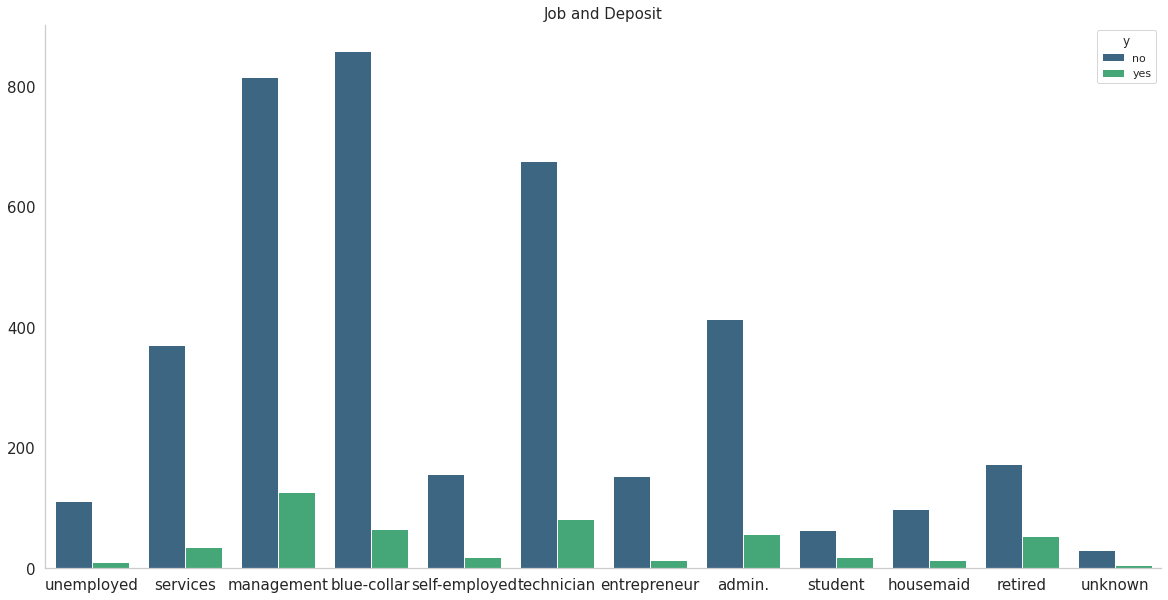

In [41]:
comparing_variables(20, 10, categorical_columns[0], "Job and Deposit")

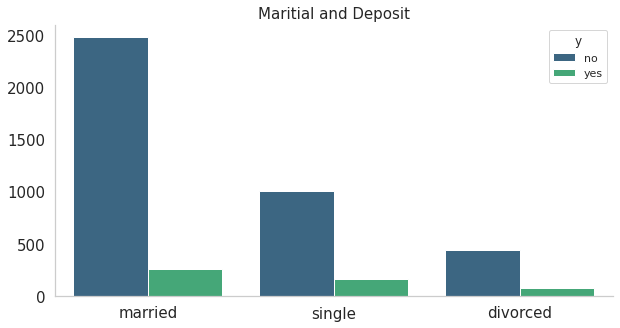

In [42]:
comparing_variables(10, 5, categorical_columns[1], "Maritial and Deposit")

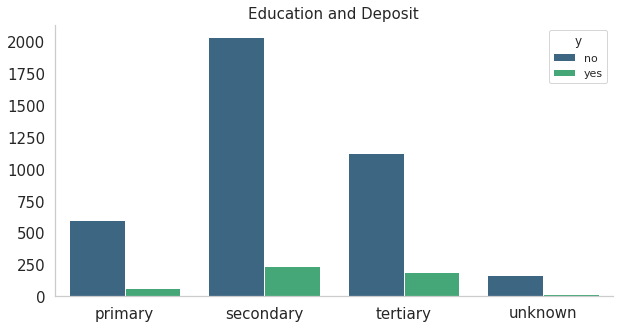

In [43]:
comparing_variables(10, 5, categorical_columns[2], "Education and Deposit")

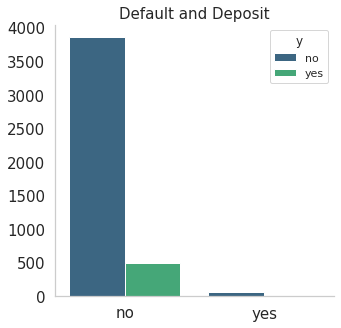

In [44]:
comparing_variables(5, 5, categorical_columns[3], "Default and Deposit")

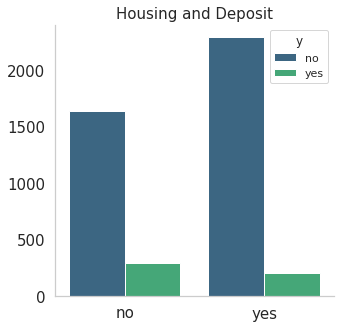

In [45]:
comparing_variables(5, 5, categorical_columns[4], "Housing and Deposit")

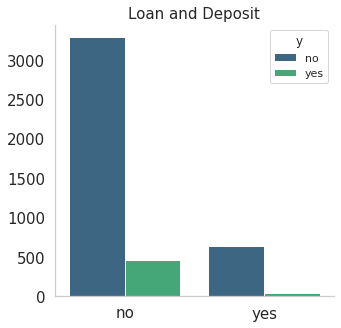

In [46]:
comparing_variables(5, 5, categorical_columns[5], "Loan and Deposit")

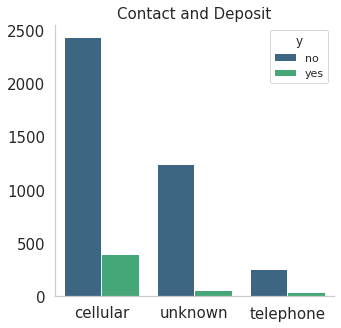

In [47]:
comparing_variables(5, 5, categorical_columns[6], "Contact and Deposit")

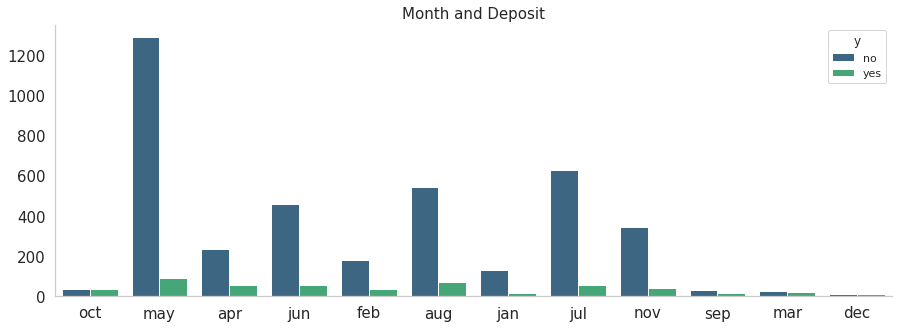

In [48]:
comparing_variables(15, 5, categorical_columns[7], "Month and Deposit")

In [49]:
len(dataset.age.unique())

67

In [50]:
# Creating age bins, and setting dummy values. 1 = 18-32, 2 = 33-48, 3 = 49-65, 4 = 65+. Bins are created according to quartiles.

bins = [0, 33, 49, 65, np.inf]
names = [1, 2, 3, 4]

dataset['age_range'] = pd.cut(dataset['age'], bins, labels = names)

dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_range
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,2
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,3


In [51]:
age_labels = ['18-32', '33-48', '49-65', '65+']

# Function for extracting data for creating the table for comparing Ages and Y/N deposits.
def getCount(yes_no, age_bin):
    extract = pd.DataFrame()
    extract = dataset.loc[(dataset.y == yes_no) & (dataset.age_range == age_bin)]
    return len(extract)

age_yes_no_0 = pd.DataFrame(data=[[getCount("no", 1), getCount("no", 2), getCount("no", 3), getCount("no", 4)]], 
                          columns=[age_labels[0], age_labels[1], age_labels[2], age_labels[3]])
age_yes_no_1 = pd.DataFrame(data=[[getCount("yes", 1), getCount("yes", 2), getCount("yes", 3), getCount("yes", 4)]], 
                          columns=[age_labels[0], age_labels[1], age_labels[2], age_labels[3]])
age_yes_no = age_yes_no_0.append(age_yes_no_1, ignore_index=True)
age_yes_no

,18-32,33-48,49-65,65+
0,1065,1979,828,50
1,150,223,100,30


In [52]:
age_no = age_yes_no_0.iloc[0]
age_yes = age_yes_no_1.iloc[0]

In [53]:
# Function for drawing plotbar. Need to pass data (deposit_no and deposit_yes) which are created in previous DataFrame, title, label names.

def plotbar(deposit_no, deposit_yes, title, labels):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, deposit_no, width, label='No')
    rects2 = ax.bar(x + width/2, deposit_yes, width, label='Yes')
    
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
        
    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

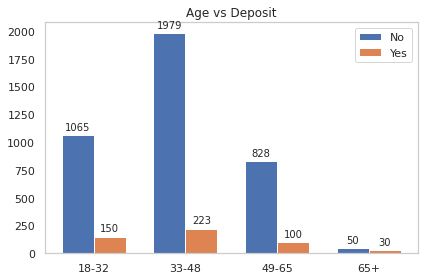

In [54]:
plotbar(age_no, age_yes, "Age vs Deposit", age_labels)

In [55]:
balance_labels = ["Range", "Yes", "No"]

# Extracting data for creating the table for comparing Balance and Y/N deposits

extract_1_y = pd.DataFrame()
extract_1_y = dataset.loc[(dataset.y == "yes") & (dataset.balance < 1000)]

extract_1_n = pd.DataFrame()
extract_1_n = dataset.loc[(dataset.y == "no") & (dataset.balance < 1000)]

extract_1_2_y = pd.DataFrame()
extract_1_2_y = dataset.loc[(dataset.y == "yes") & (dataset.balance > 1000) & (dataset.balance < 2000)]

extract_1_2_n = pd.DataFrame()
extract_1_2_n = dataset.loc[(dataset.y == "no") & (dataset.balance > 1000) & (dataset.balance < 2000)]

extract_2_5_y = pd.DataFrame()
extract_2_5_y = dataset.loc[(dataset.y == "yes") & (dataset.balance > 2000) & (dataset.balance < 5000)]

extract_2_5_n = pd.DataFrame()
extract_2_5_n = dataset.loc[(dataset.y == "no") & (dataset.balance > 2000) & (dataset.balance < 5000)]

extract_5_y = pd.DataFrame()
extract_5_y = dataset.loc[(dataset.y == "yes") & (dataset.balance > 5000)]

extract_5_n = pd.DataFrame()
extract_5_n = dataset.loc[(dataset.y == "no") & (dataset.balance > 5000)]


balance_1 = pd.DataFrame(data=[["< 1.000", len(extract_1_y), len(extract_1_n)]], 
                          columns=[balance_labels[0], balance_labels[1], balance_labels[2]])

balance_1_2 = pd.DataFrame(data=[["1.000 - 2.000", len(extract_1_2_y), len(extract_1_2_n)]], 
                          columns=[balance_labels[0], balance_labels[1], balance_labels[2]])
balance_yes_no = balance_1.append(balance_1_2, ignore_index=True)

balance_2_5 = pd.DataFrame(data=[["2.000 - 5.000", len(extract_2_5_y), len(extract_2_5_n)]], 
                          columns=[balance_labels[0], balance_labels[1], balance_labels[2]])
balance_yes_no = balance_yes_no.append(balance_2_5, ignore_index=True)

balance_5 = pd.DataFrame(data=[["> 5.000", len(extract_5_y), len(extract_5_n)]], 
                          columns=[balance_labels[0], balance_labels[1], balance_labels[2]])
balance_yes_no = balance_yes_no.append(balance_5, ignore_index=True)

balance_yes_no

,Range,Yes,No
0,< 1.000,291,2689
1,1.000 - 2.000,77,505
2,2.000 - 5.000,102,463
3,> 5.000,33,265


In [56]:
duration_labels = ["Range", "Yes", "No"]

# Extracting data for creating the table for comparing Duration and Y/N deposits

extract_duration_300_y = pd.DataFrame()
extract_duration_300_y = dataset.loc[(dataset.y == "yes") & (dataset.duration >= 1) & (dataset.duration <= 300)]

extract_duration_300_n = pd.DataFrame()
extract_duration_300_n = dataset.loc[(dataset.y == "no") & (dataset.duration >= 1) & (dataset.duration <= 300)]

extract_duration_600_y = pd.DataFrame()
extract_duration_600_y = dataset.loc[(dataset.y == "yes") & (dataset.duration > 300) & (dataset.duration <= 600)]

extract_duration_600_n = pd.DataFrame()
extract_duration_600_n = dataset.loc[(dataset.y == "no") & (dataset.duration > 300) & (dataset.duration <= 600)]

extract_duration_1200_y = pd.DataFrame()
extract_duration_1200_y = dataset.loc[(dataset.y == "yes") & (dataset.duration > 600) & (dataset.duration <= 1200)]

extract_duration_1200_n = pd.DataFrame()
extract_duration_1200_n = dataset.loc[(dataset.y == "no") & (dataset.duration > 600) & (dataset.duration <= 1200)]

extract_duration_1800_y = pd.DataFrame()
extract_duration_1800_y = dataset.loc[(dataset.y == "yes") & (dataset.duration > 1200) & (dataset.duration <= 1800)]

extract_duration_1800_n = pd.DataFrame()
extract_duration_1800_n = dataset.loc[(dataset.y == "no") & (dataset.duration > 1200) & (dataset.duration <= 1800)]

extract_duration_above_1800_y = pd.DataFrame()
extract_duration_above_1800_y = dataset.loc[(dataset.y == "yes") & (dataset.duration > 1800)]

extract_duration_above_1800_n = pd.DataFrame()
extract_duration_above_1800_n = dataset.loc[(dataset.y == "no") & (dataset.duration > 1800)]


duration_300 = pd.DataFrame(data=[["< 300", len(extract_duration_300_y), len(extract_duration_300_n)]], 
                          columns=[duration_labels[0], duration_labels[1], duration_labels[2]])

duration_600 = pd.DataFrame(data=[["300 - 600", len(extract_duration_600_y), len(extract_duration_600_n)]], 
                          columns=[duration_labels[0], duration_labels[1], duration_labels[2]])
duration_yes_no = duration_300.append(duration_600, ignore_index=True)

duration_1200 = pd.DataFrame(data=[["600 - 1.200", len(extract_duration_1200_y), len(extract_duration_1200_n)]], 
                          columns=[duration_labels[0], duration_labels[1], duration_labels[2]])
duration_yes_no = duration_yes_no.append(duration_1200, ignore_index=True)

duration_1800 = pd.DataFrame(data=[["1.200 - 1.800", len(extract_duration_1800_y), len(extract_duration_1800_n)]], 
                          columns=[duration_labels[0], duration_labels[1], duration_labels[2]])
duration_yes_no = duration_yes_no.append(duration_1800, ignore_index=True)

duration_above_1800 = pd.DataFrame(data=[["> 1.800", len(extract_duration_above_1800_y), len(extract_duration_above_1800_n)]], 
                          columns=[duration_labels[0], duration_labels[1], duration_labels[2]])
duration_yes_no = duration_yes_no.append(duration_above_1800, ignore_index=True)

duration_yes_no

,Range,Yes,No
0,< 300,155,3030
1,300 - 600,161,666
2,600 - 1.200,155,205
3,1.200 - 1.800,26,18
4,> 1.800,6,3


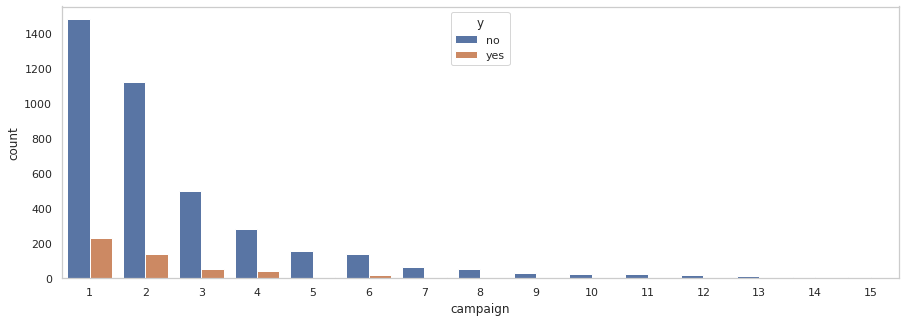

In [57]:
plt.figure(figsize=(15,5))
sns.countplot(x="campaign",hue="y",data=dataset)
plt.show()

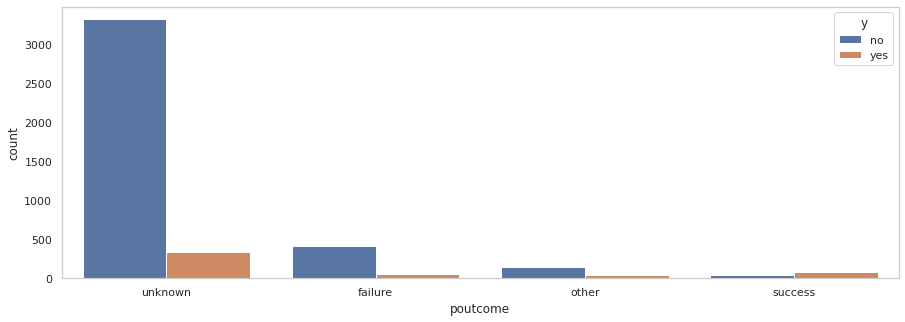

In [58]:
plt.figure(figsize=(15,5))
sns.countplot(x="poutcome",hue="y",data=dataset)
plt.show()

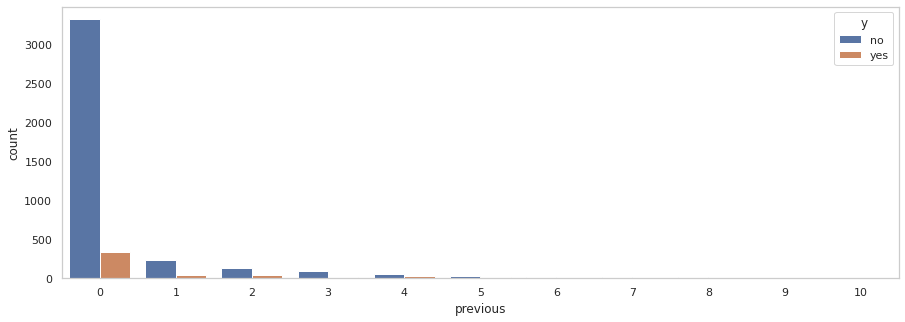

In [59]:
plt.figure(figsize=(15,5))
sns.countplot(x="previous",hue="y",data=dataset)
plt.show()

### Comparision of Dependent Variables

In [60]:
balance_and_jobs = pd.DataFrame()

jobs = ['management', 'technician', 'blue-collar', 'entrepreneur', 'retired', 'unknown', 'student', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid' ]

for job in jobs:
  balance_and_jobs[job] = (dataset[dataset['job'] == job][['job','balance']].describe())['balance']

balance_and_jobs

,management,technician,blue-collar,entrepreneur,retired,unknown,student,admin.,services,self-employed,unemployed,housemaid
count,943.000000,758.000000,925.000000,166.000000,226.000000,37.000000,83.000000,471.000000,406.000000,176.000000,122.000000,112.000000
mean,1785.647932,1329.353562,1062.011892,1646.054217,2275.128319,1527.216216,1548.337349,1231.598726,1077.275862,1370.357955,1117.106557,2083.803571
std,3295.254918,2634.700428,1972.531281,4466.841750,5868.826431,1977.843637,2595.235974,2377.163862,2447.003450,2515.604385,1726.577443,4603.836647
min,-1746.000000,-1680.000000,-1400.000000,-2082.000000,-1206.000000,0.000000,-230.000000,-967.000000,-1202.000000,-3313.000000,-872.000000,-759.000000
25%,99.500000,64.000000,60.000000,66.500000,155.250000,247.000000,55.500000,61.500000,33.000000,131.250000,20.750000,24.250000
50%,582.000000,434.500000,407.000000,354.000000,652.000000,677.000000,386.000000,451.000000,268.500000,457.500000,496.500000,296.500000
75%,1881.500000,1412.750000,1172.000000,1414.500000,2232.500000,2206.000000,1564.000000,1325.000000,1120.000000,1361.000000,1589.750000,1854.500000
max,27359.000000,27733.000000,16353.000000,42045.000000,71188.000000,7337.000000,11555.000000,22171.000000,26394.000000,16430.000000,9019.000000,26965.000000


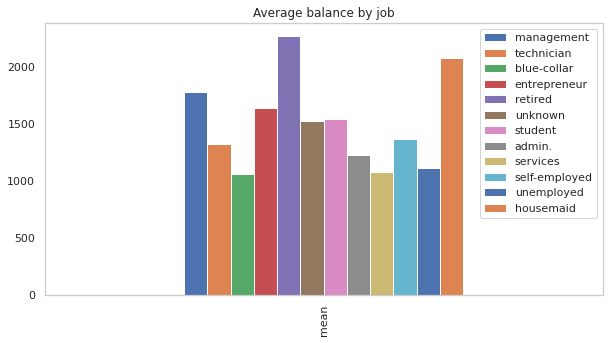

In [61]:
balance_and_jobs.drop(['count', 'std', 'min', '25%', '50%', '75%', 'max']).plot(kind = 'bar', figsize = (10, 5), title = 'Average balance by job')

In [62]:
balance_and_marital = pd.DataFrame()
balance_and_marital['Married'] = (dataset[dataset['marital'] == 'married'][['marital','balance']].describe())['balance']
balance_and_marital['Single'] = (dataset[dataset['marital'] == 'single'][['marital','balance']].describe())['balance']
balance_and_marital['Divorced'] = (dataset[dataset['marital'] == 'divorced'][['marital','balance']].describe())['balance']

balance_and_marital

,Married,Single,Divorced
count,2740.000000,1165.000000,520.000000
mean,1462.418613,1448.856652,1114.784615
std,3205.790054,2862.988206,2204.943687
min,-3313.000000,-1313.000000,-1148.000000
25%,71.000000,81.000000,28.250000
50%,451.000000,461.000000,362.500000
75%,1518.250000,1494.000000,1217.000000
max,71188.000000,27733.000000,26306.000000


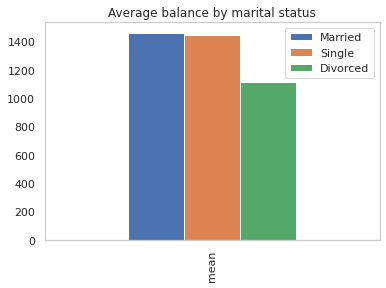

In [63]:
balance_and_marital.drop(['count', 'std', 'min', '25%', '50%', '75%', 'max']).plot.bar(title = 'Average balance by marital status')

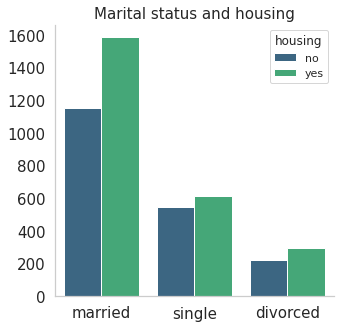

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.countplot(x = 'marital', hue = 'housing', data = dataset, palette = 'viridis')

ax.set_xlabel("", fontsize = 15)
ax.set_ylabel("", fontsize = 15)
ax.set_title("Marital status and housing", fontsize = 15)
ax.tick_params(labelsize = 15)

sns.despine()

Text(0.5, 1.0, 'Balance by Education')

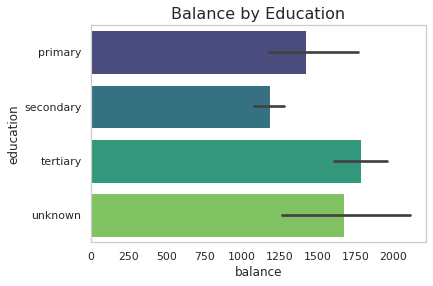

In [65]:
sns.barplot(x="balance", y="education", data=dataset, palette = 'viridis')

plt.title('Balance by Education', fontsize=16)

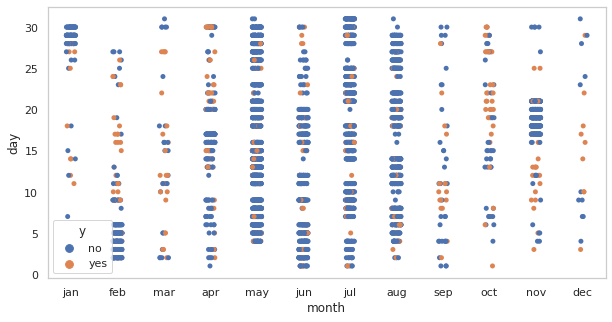

In [66]:
plt.figure(figsize=(10,5))
sns.stripplot(x="month", y="day", hue="y", data = dataset, order=("jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"))
plt.show()

## Data Cleaning

In [67]:
columns_with_yes_no = ['default', 'housing', 'loan', 'y']

for column in columns_with_yes_no:
    dataset[column].replace(['no', 'yes'], [0, 1], inplace=True)
    
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_range
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0,1
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0,1
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0,2
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0,1
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0,3


In [68]:
columns_with_categories = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in columns_with_categories:
  dataset[column] = le.fit_transform(dataset[column]) 

cleaned_dataset = dataset.copy()
cleaned_dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_range
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0,1
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0,1
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0,2
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0,1
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0,3


Dropping: contact, day, duration, campaign, previous, pdays.

In [69]:
cleaned_dataset = cleaned_dataset[['age_range', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'month', 'poutcome', 'y']]

In [70]:
cleaned_dataset.head()

,age_range,job,marital,education,default,balance,housing,loan,month,poutcome,y
0,1,10,1,0,0,1787,0,0,10,3,0
1,1,7,1,1,0,4789,1,1,8,0,0
2,2,4,2,2,0,1350,1,0,0,0,0
3,1,4,1,2,0,1476,1,1,6,3,0
4,3,1,1,1,0,0,1,0,8,3,0


## Correlation Between Features

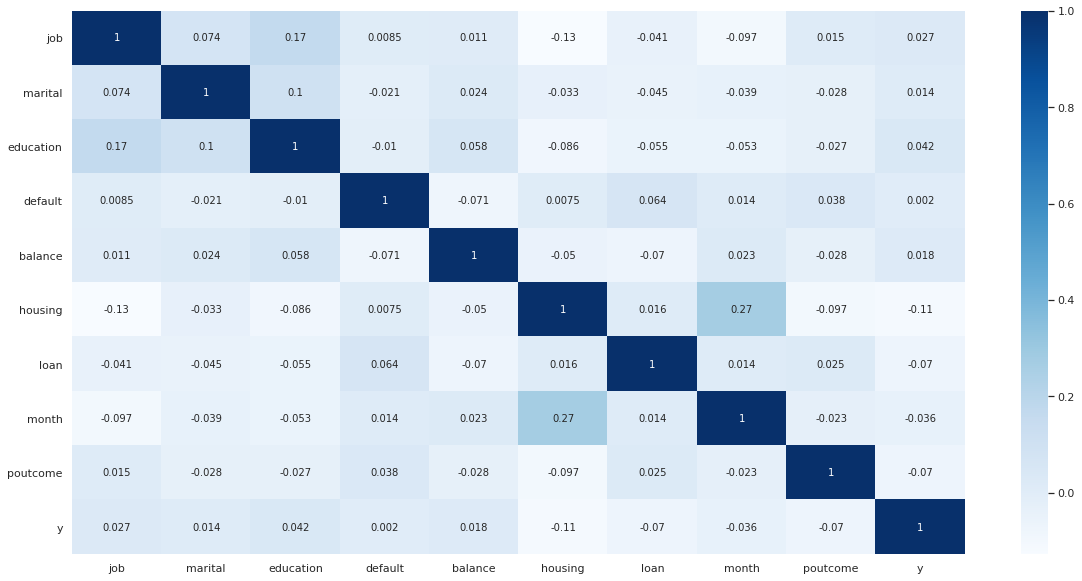

In [71]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(cleaned_dataset.corr(), cmap='Blues', annot = True)

## Preparation for training and testing

#### Defining dependent and independent variables

In [72]:
X = cleaned_dataset.iloc[:, :-1].values
y = cleaned_dataset.iloc[:, -1].values

#### Splitting the dataset into the Training and Test set

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Feature Scaling

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Models

#### 1. Logistic Classification

In [75]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 0)
log_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
y_pred = log_classifier.predict(X_test)

In [77]:
cm_log = confusion_matrix(y_test, y_pred)
print(cm_log)

accuracy_score_log_reg = accuracy_score(y_test, y_pred)
accuracy_score_log_reg = "{:.2f} %".format(accuracy_score_log_reg.mean()*100)
precision_score_log_reg = precision_score(y_test, y_pred)
precision_score_log_reg = "{:.2f} %".format(precision_score_log_reg.mean()*100)
recall_score_log_reg = recall_score(y_test, y_pred)
recall_score_log_reg = "{:.2f} %".format(recall_score_log_reg.mean()*100)

[[975   0]
 [132   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [78]:
accuracies = cross_val_score(estimator = log_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_log_reg = "{:.2f} %".format(accuracies.mean()*100)

In [79]:
results_df = pd.DataFrame(data=[["Linear Classification", val_accuracy_score_log_reg, accuracy_score_log_reg, precision_score_log_reg, recall_score_log_reg]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Linear Classification,88.82 %,88.08 %,0.00 %,0.00 %


#### 2. KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [81]:
y_pred = knn_classifier.predict(X_test)

In [82]:
cm_knn = confusion_matrix(y_test, y_pred)
print(cm_knn)

accuracy_score_knn = accuracy_score(y_test, y_pred)
accuracy_score_knn = "{:.2f} %".format(accuracy_score_knn.mean()*100)
precision_score_knn = precision_score(y_test, y_pred)
precision_score_knn = "{:.2f} %".format(precision_score_knn.mean()*100)
recall_score_knn = recall_score(y_test, y_pred)
recall_score_knn = "{:.2f} %".format(recall_score_knn.mean()*100)

[[966   9]
 [120  12]]


In [83]:
accuracies = cross_val_score(estimator = knn_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_knn = "{:.2f} %".format(accuracies.mean()*100)

In [84]:
results_df_2 = pd.DataFrame(data=[["KNN", val_accuracy_score_knn, accuracy_score_knn, precision_score_knn, recall_score_knn]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Linear Classification,88.82 %,88.08 %,0.00 %,0.00 %
1,KNN,88.34 %,88.35 %,57.14 %,9.09 %


#### 3. SVM

In [85]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [86]:
y_pred = svm_classifier.predict(X_test)

In [87]:
cm_svm = confusion_matrix(y_test, y_pred)
print(cm_svm)

accuracy_score_svm = accuracy_score(y_test, y_pred)
accuracy_score_svm = "{:.2f} %".format(accuracy_score_svm.mean()*100)
precision_score_svm = precision_score(y_test, y_pred)
precision_score_svm = "{:.2f} %".format(precision_score_svm.mean()*100)
recall_score_svm = recall_score(y_test, y_pred)
recall_score_svm = "{:.2f} %".format(recall_score_svm.mean()*100)

[[975   0]
 [132   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
accuracies = cross_val_score(estimator = svm_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_svm = "{:.2f} %".format(accuracies.mean()*100)

In [89]:
results_df_3 = pd.DataFrame(data=[["SVM", val_accuracy_score_svm, accuracy_score_svm, precision_score_svm, recall_score_svm]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_3, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Linear Classification,88.82 %,88.08 %,0.00 %,0.00 %
1,KNN,88.34 %,88.35 %,57.14 %,9.09 %
2,SVM,88.82 %,88.08 %,0.00 %,0.00 %


#### 4. Kernel SVM

In [90]:
from sklearn.svm import SVC
kernel_svm_classifier = SVC(kernel = 'rbf', random_state = 0)
kernel_svm_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [91]:
y_pred = kernel_svm_classifier.predict(X_test)

In [92]:
cm_kernel_svm = confusion_matrix(y_test, y_pred)
print(cm_kernel_svm)

accuracy_score_kernel_svm = accuracy_score(y_test, y_pred)
accuracy_score_kernel_svm = "{:.2f} %".format(accuracy_score_kernel_svm.mean()*100)
precision_score_kernel_svm = precision_score(y_test, y_pred)
precision_score_kernel_svm = "{:.2f} %".format(precision_score_kernel_svm.mean()*100)
recall_score_kernel_svm = recall_score(y_test, y_pred)
recall_score_kernel_svm = "{:.2f} %".format(recall_score_kernel_svm.mean()*100)

[[975   0]
 [132   0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
accuracies = cross_val_score(estimator = kernel_svm_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_kernel_svm = "{:.2f} %".format(accuracies.mean()*100)

In [94]:
results_df_4 = pd.DataFrame(data=[["Kernel SVM", val_accuracy_score_kernel_svm, accuracy_score_kernel_svm, precision_score_kernel_svm, recall_score_kernel_svm]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_4, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Linear Classification,88.82 %,88.08 %,0.00 %,0.00 %
1,KNN,88.34 %,88.35 %,57.14 %,9.09 %
2,SVM,88.82 %,88.08 %,0.00 %,0.00 %
3,Kernel SVM,88.82 %,88.08 %,0.00 %,0.00 %


#### 5. Naive Bayes

In [95]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [96]:
y_pred = nb_classifier.predict(X_test)

In [97]:
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)

accuracy_score_nb = accuracy_score(y_test, y_pred)
accuracy_score_nb = "{:.2f} %".format(accuracy_score_nb.mean()*100)
precision_score_nb = precision_score(y_test, y_pred)
precision_score_nb = "{:.2f} %".format(precision_score_nb.mean()*100)
recall_score_nb = recall_score(y_test, y_pred)
recall_score_nb = "{:.2f} %".format(recall_score_nb.mean()*100)

[[950  25]
 [127   5]]


In [98]:
accuracies = cross_val_score(estimator = nb_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_nb = "{:.2f} %".format(accuracies.mean()*100)

In [99]:
results_df_5 = pd.DataFrame(data=[["Naive Bayes", val_accuracy_score_nb, accuracy_score_nb, precision_score_nb, recall_score_nb]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_5, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Linear Classification,88.82 %,88.08 %,0.00 %,0.00 %
1,KNN,88.34 %,88.35 %,57.14 %,9.09 %
2,SVM,88.82 %,88.08 %,0.00 %,0.00 %
3,Kernel SVM,88.82 %,88.08 %,0.00 %,0.00 %
4,Naive Bayes,87.58 %,86.27 %,16.67 %,3.79 %


#### 6. Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [101]:
y_pred = decision_tree_classifier.predict(X_test)

In [102]:
cm_decision_tree = confusion_matrix(y_test, y_pred)
print(cm_decision_tree)

accuracy_score_decision_tree = accuracy_score(y_test, y_pred)
accuracy_score_decision_tree = "{:.2f} %".format(accuracy_score_decision_tree.mean()*100)
precision_score_decision_tree = precision_score(y_test, y_pred)
precision_score_decision_tree = "{:.2f} %".format(precision_score_decision_tree.mean()*100)
recall_score_decision_tree = recall_score(y_test, y_pred)
recall_score_decision_tree = "{:.2f} %".format(recall_score_decision_tree.mean()*100)

[[850 125]
 [109  23]]


In [103]:
accuracies = cross_val_score(estimator = decision_tree_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_decision_tree = "{:.2f} %".format(accuracies.mean()*100)

In [104]:
results_df_6 = pd.DataFrame(data=[["Decision Tree", val_accuracy_score_decision_tree, accuracy_score_decision_tree, precision_score_decision_tree, recall_score_decision_tree]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_6, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Linear Classification,88.82 %,88.08 %,0.00 %,0.00 %
1,KNN,88.34 %,88.35 %,57.14 %,9.09 %
2,SVM,88.82 %,88.08 %,0.00 %,0.00 %
3,Kernel SVM,88.82 %,88.08 %,0.00 %,0.00 %
4,Naive Bayes,87.58 %,86.27 %,16.67 %,3.79 %
5,Decision Tree,82.19 %,78.86 %,15.54 %,17.42 %


#### 7. Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [106]:
y_pred = random_forest_classifier.predict(X_test)

In [107]:
cm_random_forest = confusion_matrix(y_test, y_pred)
print(cm_random_forest)

accuracy_score_random_forest = accuracy_score(y_test, y_pred)
accuracy_score_random_forest = "{:.2f} %".format(accuracy_score_random_forest.mean()*100)
precision_score_random_forest = precision_score(y_test, y_pred)
precision_score_random_forest = "{:.2f} %".format(precision_score_random_forest.mean()*100)
recall_score_random_forest = recall_score(y_test, y_pred)
recall_score_random_forest = "{:.2f} %".format(recall_score_random_forest.mean()*100)

[[961  14]
 [118  14]]


In [108]:
accuracies = cross_val_score(estimator = random_forest_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_random_forest = "{:.2f} %".format(accuracies.mean()*100)

In [109]:
results_df_7 = pd.DataFrame(data=[["Random Forest", val_accuracy_score_random_forest, accuracy_score_random_forest, precision_score_random_forest, recall_score_random_forest]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_7, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Linear Classification,88.82 %,88.08 %,0.00 %,0.00 %
1,KNN,88.34 %,88.35 %,57.14 %,9.09 %
2,SVM,88.82 %,88.08 %,0.00 %,0.00 %
3,Kernel SVM,88.82 %,88.08 %,0.00 %,0.00 %
4,Naive Bayes,87.58 %,86.27 %,16.67 %,3.79 %
5,Decision Tree,82.19 %,78.86 %,15.54 %,17.42 %
6,Random Forest,88.06 %,88.08 %,50.00 %,10.61 %


#### 8. XGBoost

In [110]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [111]:
y_pred = xgb_classifier.predict(X_test)

In [112]:
cm_xgb = confusion_matrix(y_test, y_pred)
print(cm_xgb)

accuracy_score_xgb = accuracy_score(y_test, y_pred)
accuracy_score_xgb = "{:.2f} %".format(accuracy_score_xgb.mean()*100)
precision_score_xgb = precision_score(y_test, y_pred)
precision_score_xgb = "{:.2f} %".format(precision_score_xgb.mean()*100)
recall_score_xgb = recall_score(y_test, y_pred)
recall_score_xgb = "{:.2f} %".format(recall_score_xgb.mean()*100)

[[969   6]
 [114  18]]


In [113]:
accuracies = cross_val_score(estimator = xgb_classifier, X = X_train, y = y_train, cv = 10)
val_accuracy_score_xgb = "{:.2f} %".format(accuracies.mean()*100)

In [114]:
results_df_8 = pd.DataFrame(data=[["XGBoost", val_accuracy_score_xgb, accuracy_score_xgb, precision_score_xgb, recall_score_xgb]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_8, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Linear Classification,88.82 %,88.08 %,0.00 %,0.00 %
1,KNN,88.34 %,88.35 %,57.14 %,9.09 %
2,SVM,88.82 %,88.08 %,0.00 %,0.00 %
3,Kernel SVM,88.82 %,88.08 %,0.00 %,0.00 %
4,Naive Bayes,87.58 %,86.27 %,16.67 %,3.79 %
5,Decision Tree,82.19 %,78.86 %,15.54 %,17.42 %
6,Random Forest,88.06 %,88.08 %,50.00 %,10.61 %
7,XGBoost,89.24 %,89.16 %,75.00 %,13.64 %


### 9. ANN

In [115]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [116]:
ann.fit(X_train, y_train, epochs = 100)

Epoch 1/100
104/104 [==============================] - 0s 1ms/step - loss: 0.6539 - accuracy: 0.6227
Epoch 2/100
104/104 [==============================] - 0s 1ms/step - loss: 0.3769 - accuracy: 0.8879
Epoch 3/100
104/104 [==============================] - 0s 1ms/step - loss: 0.3499 - accuracy: 0.8882
Epoch 4/100
104/104 [==============================] - 0s 1ms/step - loss: 0.3418 - accuracy: 0.8882
Epoch 5/100
104/104 [==============================] - 0s 1ms/step - loss: 0.3381 - accuracy: 0.8876
Epoch 6/100
104/104 [==============================] - 0s 1ms/step - loss: 0.3347 - accuracy: 0.8876
Epoch 7/100
104/104 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.8879
Epoch 8/100
104/104 [==============================] - 0s 1ms/step - loss: 0.3296 - accuracy: 0.8879
Epoch 9/100
104/104 [==============================] - 0s 1ms/step - loss: 0.3276 - accuracy: 0.8882
Epoch 10/100
104/104 [==============================] - 0s 1ms/step - loss: 0.3257 - accura

In [117]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

In [118]:
cm_ann = confusion_matrix(y_test, y_pred)
print(cm_ann)

accuracy_score_ann = accuracy_score(y_test, y_pred)
accuracy_score_ann = "{:.2f} %".format(accuracy_score_ann.mean()*100)
precision_score_ann = precision_score(y_test, y_pred)
precision_score_ann = "{:.2f} %".format(precision_score_ann.mean()*100)
recall_score_ann = recall_score(y_test, y_pred)
recall_score_ann = "{:.2f} %".format(recall_score_ann.mean()*100)

[[963  12]
 [112  20]]


In [119]:
results_df_9 = pd.DataFrame(data=[["ANN", "-", accuracy_score_ann, precision_score_ann, recall_score_ann]], 
                          columns=['Model', 'Validation Accuracy', 'Accuracy', 'Precision', 'Recall'])
results_df = results_df.append(results_df_9, ignore_index=True)
results_df

,Model,Validation Accuracy,Accuracy,Precision,Recall
0,Linear Classification,88.82 %,88.08 %,0.00 %,0.00 %
1,KNN,88.34 %,88.35 %,57.14 %,9.09 %
2,SVM,88.82 %,88.08 %,0.00 %,0.00 %
3,Kernel SVM,88.82 %,88.08 %,0.00 %,0.00 %
4,Naive Bayes,87.58 %,86.27 %,16.67 %,3.79 %
5,Decision Tree,82.19 %,78.86 %,15.54 %,17.42 %
6,Random Forest,88.06 %,88.08 %,50.00 %,10.61 %
7,XGBoost,89.24 %,89.16 %,75.00 %,13.64 %
8,ANN,-,88.80 %,62.50 %,15.15 %


## ANN - Hyperparameter Tuning

In [120]:
from tensorboard.plugins.hparams import api as hp

HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([6, 16, 32]))
HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_NUM_UNITS, HP_DROPOUT, HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )


def train_test_model(hparams):
    model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation="relu"),
    tf.keras.layers.Dense(hparams[HP_NUM_UNITS], activation="relu"),
    tf.keras.layers.Dropout(hparams[HP_DROPOUT]),
    tf.keras.layers.Dense(10, activation="sigmoid"),
  ])
    model.compile(optimizer=hparams[HP_OPTIMIZER], loss='sparse_categorical_crossentropy', metrics=['accuracy'],)

    model.fit(X_train, y_train, epochs=50)
    _, accuracy = model.evaluate(X_test, y_test)
    return accuracy

In [121]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)

In [122]:
session_num = 0

for num_units in HP_NUM_UNITS.domain.values:
  for dropout_rate in (HP_DROPOUT.domain.min_value, HP_DROPOUT.domain.max_value):
    for optimizer in HP_OPTIMIZER.domain.values:
      hparams = {
          HP_NUM_UNITS: num_units,
          HP_DROPOUT: dropout_rate,
          HP_OPTIMIZER: optimizer,
      }
      run_name = "run-%d" % session_num
      print('--- Starting trial: %s' % run_name)
      print({h.name: hparams[h] for h in hparams})
      run('logs/hparam_tuning/' + run_name, hparams)
      session_num += 1

--- Starting trial: run-0
{'num_units': 6, 'dropout': 0.1, 'optimizer': 'adam'}
Epoch 1/50
104/104 [==============================] - 0s 1ms/step - loss: 2.2277 - accuracy: 0.2872
Epoch 2/50
104/104 [==============================] - 0s 1ms/step - loss: 1.8809 - accuracy: 0.7673
Epoch 3/50
104/104 [==============================] - 0s 1ms/step - loss: 1.2271 - accuracy: 0.8816
Epoch 4/50
104/104 [==============================] - 0s 1ms/step - loss: 0.6429 - accuracy: 0.8876
Epoch 5/50
104/104 [==============================] - 0s 1ms/step - loss: 0.4492 - accuracy: 0.8879
Epoch 6/50
104/104 [==============================] - 0s 2ms/step - loss: 0.3986 - accuracy: 0.8882
Epoch 7/50
104/104 [==============================] - 0s 2ms/step - loss: 0.3868 - accuracy: 0.8879
Epoch 8/50
104/104 [==============================] - 0s 1ms/step - loss: 0.3747 - accuracy: 0.8879
Epoch 9/50
104/104 [==============================] - 0s 1ms/step - loss: 0.3692 - accuracy: 0.8879
Epoch 10/50
104/104 

In [ ]:
%load_ext tensorboard

%tensorboard --logdir logs/hparam_tuning